<a href="https://colab.research.google.com/github/dylankim98/first-repository/blob/main/%EA%B8%B0%EC%B4%88_%ED%86%B5%EA%B3%84_MainQuest03_%EA%B9%80%EB%8F%99%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE


In [294]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("tunguz/online-retail")

print("Path to dataset files:", path)
df = pd.read_csv(path + '/' + os.listdir(path)[0], encoding='latin1')
df.shape

Using Colab cache for faster access to the 'online-retail' dataset.
Path to dataset files: /kaggle/input/online-retail


(541909, 8)

In [295]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [297]:
# 주문 가격 피쳐 생성
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

In [298]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# 'InvoiceDate' 컬럼 이용하여 판매 월 추출
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

/tmp/ipython-input-3844768752.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


## 1. 모집단과 표본 집단의 TotalPrice를 비교해 주세요.

* 데이터셋에서 무작위로 1000개의 표본을 추출하세요.
* 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교해주세요.  
* 중심극한정리를 사용해 모집단과 표본의 차이를 설명해주세요.

In [299]:
sam = df.sample(n=1000, random_state=42)

# 1. mean, std 비교
print(df['TotalPrice'].mean())
print(df['TotalPrice'].std())
print(sam['TotalPrice'].mean())
print(sam['TotalPrice'].std())

# Ans(1,2). 중심극한정리에 의하면 표본은 samples 수가 31개 이상으로 충분한 샘플 수를 보유하고있다.
# 따라서 모집단과 표본집단의 평균 차이는 1정도로 근접하나, 표준편차에서 상당한 차이를 보인다.
# 아마 표본에 극단값이 덜 포함된 이유로 파악된다.



17.98779487699964
378.81082350615196
16.832069999999998
64.46732773087352


## 2. 주문이 가장 많은 상위 두 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요.

* 'Country' 변수를 바탕으로 주문이 가장 많은 상위 두 국가를 찾으세요.
* 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요.  
* t-통계량과 p-값을 해석하여 결과를 설명하고, 1종 오류와 2종 오류의 개념을 적용하여 설명해주세요.

In [300]:
# Ans(1). UK, EIRE
Q2 = sam['Country'].value_counts().head(2)
display(Q2)

,count
Country,
United Kingdom,900
EIRE,20


In [301]:

# Ans(2). 두 국가의 평균 차이는 없었다.
from scipy.stats import ttest_ind, levene

UK = sam[sam['Country'] == 'United Kingdom']['TotalPrice']
EIRE = sam[sam['Country'] == 'EIRE']['TotalPrice']
print(levene(UK, EIRE)) # 등분산이다. (p-value > 0.05)


t_stats, p = ttest_ind(UK, EIRE, equal_var=True) # 등분산 설정
print(t_stats, p)

# 독립표본 t검정 이후 p-value가 0.55로 귀무가설(평균이 같음)이 기각되지 못한다.
# 즉, 두 국가의 평균 차이는 없었다.

LeveneResult(statistic=np.float64(0.03940581683693473), pvalue=np.float64(0.8426908088232822))
-0.5088733740372271 0.6109632632391099


In [302]:
# Ans(3). 표본 : t_stats,p-value == (-0.5088733740372271 0.6109632632391099)
#       모집단 : t_stats,p-value == (-3.574609135907158 0.00035078425729634784)


UK = df[df['Country'] == 'United Kingdom']['TotalPrice']
EIRE = df[df['Country'] == 'EIRE']['TotalPrice']
print(levene(UK, EIRE)) # 등분산X. (p-value < 0.05)


t_stats, p = ttest_ind(UK, EIRE, equal_var=False) # 등분산 설정X
print(t_stats, p)


# 1,2종 오류를 알기 위해선 시행횟수를 늘려야하지만, 단일 표본으로 진행했다. (Ans.1의 sam)
# 표본에선 평균이 같다고 나오지만, 모집단에선 그렇지 않다.
# 즉, 실제로는 평균에 차이가 있지만 실험상에선 그렇지 않다로 나왔으니 2종오류에 해당한다.



LeveneResult(statistic=np.float64(4.424630453309964), pvalue=np.float64(0.035424277721306484))
-13.11038258421799 4.9648190165536035e-39


## 3. 주중, 주말에 따라서 발생하는 UnitPrice의 분포가 달라지는지 확인하세요.

* 주중의 'UnitPrice'와 주말의 'UnitPrice'의 분포를 분석하기 위해 데이터의 중심경향치(평균, 중간값), 변산성(표준편차, 분산), 분위수를 계산하세요.  
* 상자수염그림과 히스토그램을 그려 시각화를 통해 분포를 확인하고 데이터의 분포에 대해 설명해주세요.

In [303]:
# Ans(1). 하기 결과와 같습니다.

df['InvoiceDate'].info()

df['dayofweek'] = df['InvoiceDate'].dt.dayofweek
df['daytype'] = df['dayofweek'].apply(lambda x: '주말' if x >= 5 else '평일')
df.groupby('daytype')['UnitPrice'].describe()


<class 'pandas.core.series.Series'>
RangeIndex: 541909 entries, 0 to 541908
Series name: InvoiceDate
Non-Null Count   Dtype         
--------------   -----         
541909 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.1 MB


,count,mean,std,min,25%,50%,75%,max
daytype,,,,,,,,
주말,64375.0,2.887824,7.959497,0.00,1.25,1.85,3.75,1236.75
평일,477534.0,4.843425,103.032058,-11062.06,1.25,2.10,4.13,38970.00


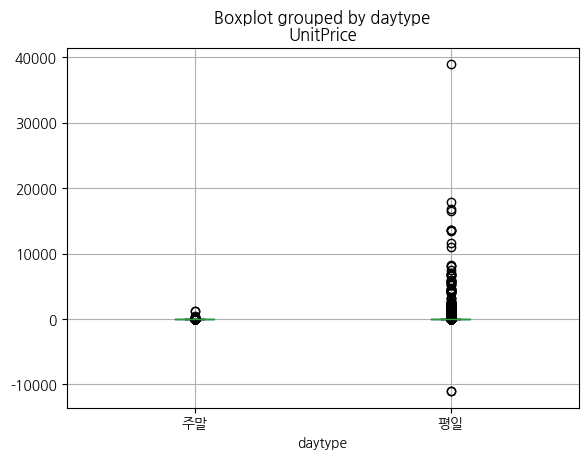

<Axes: title={'center': 'UnitPrice_log'}, xlabel='daytype'>

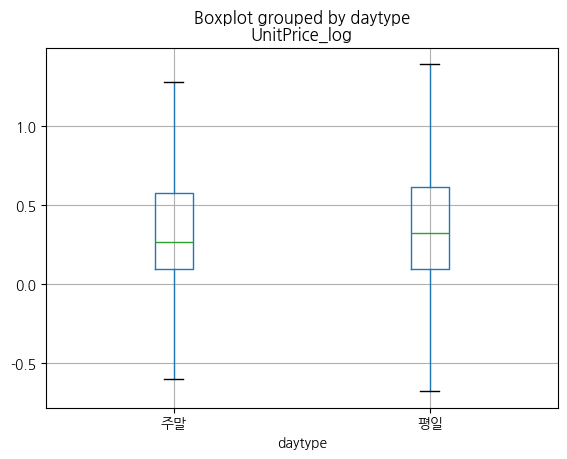

In [304]:
# Ans(2). 모집단에 이상치가 꽤 있어 log치환했습니다.
# 원본, log결과 비교시, 평일 및 주말의 중앙값이 비슷합니다. IQR상자 높낮이도 비슷하구요.
# 즉 평일/주말간 단가 분포는 유사해보입니다.

df.boxplot(column='UnitPrice', by='daytype')
plt.show()
df_log = df[df['UnitPrice'] > 0].copy()
df_log['UnitPrice_log'] = np.log10(df_log['UnitPrice'])
df_log.boxplot(column='UnitPrice_log', by='daytype', showfliers=False)

,UnitPrice
count,541909.000000
mean,4.611114
std,96.759853
min,-11062.060000
25%,1.250000
50%,2.080000
75%,4.130000
max,38970.000000


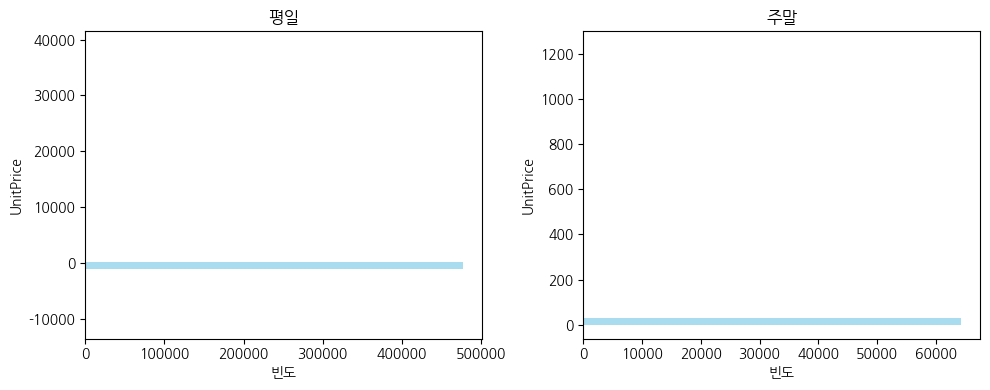

In [305]:
# Ans(2). 실제로 unitprice가 10~100 언저리에 많이 분포됨을 확인했습니다.
# 다만, 가격임에도 음수가 있네요. 이상치 제거가 필요해보입니다.

display(df['UnitPrice'].describe())



fig, axes = plt.subplots(1, 2, figsize=(10,4))

for ax, d in zip(axes, ['평일', '주말']):
    df[df['daytype']==d]['UnitPrice'].plot(
        kind='hist', bins=40, alpha=0.7, ax=ax, color='skyblue', orientation='horizontal')
    ax.set_title(d)
    ax.set_ylabel('UnitPrice')
    ax.set_xlabel('빈도')
plt.tight_layout()
plt.show()




## 4. 상품의 단가와 판매 국가, 판매 날짜을 이용해 판매 수량을 예측하는 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* 변수를 다음과 같이 설정하여 다중 선형 회귀 분석을 진행하세요.
    * 종속변수: 판매 수량(`Quantity`)
    * 독립변수: 상품 단가(`UnitPrice`), 판매 국가(`Country`), 판매 요일(`DayOfWeek`), 판매 월( `InvoiceMonth`)   
* 회귀계수와 결정계수를 활용하여 회귀 분석 결과를 해석해주세요.

In [306]:
display(df.info())

# Ans(1). 이상, 결측치 제거
# 이상치 (음수 수량)인줄알았으나, 환불이라고 합니다.
df = df[(df['UnitPrice'] > 0)].copy()
# 결측치 (CustomerID, Description)에 있는데, 회귀변수로 사용X 그래서 drop(na)했습니다.
df = df.drop(columns=['CustomerID'])
df = df.dropna(subset=['Description'])

display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     541909 non-null  object        
 1   StockCode     541909 non-null  object        
 2   Description   540455 non-null  object        
 3   Quantity      541909 non-null  int64         
 4   InvoiceDate   541909 non-null  datetime64[ns]
 5   UnitPrice     541909 non-null  float64       
 6   CustomerID    406829 non-null  float64       
 7   Country       541909 non-null  object        
 8   TotalPrice    541909 non-null  float64       
 9   DayOfWeek     541909 non-null  int32         
 10  InvoiceMonth  541909 non-null  int32         
 11  dayofweek     541909 non-null  int32         
 12  daytype       541909 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(3), int64(1), object(5)
memory usage: 47.5+ MB


None

<class 'pandas.core.frame.DataFrame'>
Index: 539392 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     539392 non-null  object        
 1   StockCode     539392 non-null  object        
 2   Description   539392 non-null  object        
 3   Quantity      539392 non-null  int64         
 4   InvoiceDate   539392 non-null  datetime64[ns]
 5   UnitPrice     539392 non-null  float64       
 6   Country       539392 non-null  object        
 7   TotalPrice    539392 non-null  float64       
 8   DayOfWeek     539392 non-null  int32         
 9   InvoiceMonth  539392 non-null  int32         
 10  dayofweek     539392 non-null  int32         
 11  daytype       539392 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(3), int64(1), object(5)
memory usage: 47.3+ MB


None

In [307]:
display(df.head(2))

# 국가별 등장 빈도 확인결과 UK가 압도적으로 많습니다.
# 이런 경우엔 선형회귀는 적합하지 않습니다.
# 선형회귀에선 다중공선성 문제가 중요하니, 상위 5개 국가 외 나머지는 others로 묶었습니다.
print(df['Country'].value_counts())

top_countries = ['United Kingdom', 'Germany', 'France', 'EIRE', 'Spain']

df['Country_grp'] = df['Country'].apply(lambda x: x if x in top_countries else 'Other')
df['Country_grp'].value_counts()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,TotalPrice,DayOfWeek,InvoiceMonth,dayofweek,daytype
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,2,12,2,평일
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2,12,2,평일


Country
United Kingdom          492979
Germany                   9493
France                    8556
EIRE                      8192
Spain                     2532
Netherlands               2367
Belgium                   2069
Switzerland               2001
Portugal                  1519
Australia                 1256
Norway                    1085
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         57


,count
Country_grp,
United Kingdom,492979
Other,17640
Germany,9493
France,8556
EIRE,8192
Spain,2532


In [308]:
 # 요일, 월 파생변수 생성
df['dayofweek'] = df['InvoiceDate'].dt.dayofweek
df['daytype'] = df['dayofweek'].apply(lambda x: '주말' if x >= 5 else '평일')
df['InvoiceMonth'] = df['InvoiceDate'].dt.month

# 다중회귀용 데이터 구성
mul_reg = df[['Quantity', 'UnitPrice', 'Country_grp', 'dayofweek', 'InvoiceMonth']]
mul_reg_en = pd.get_dummies(mul_reg, columns=['Country_grp', 'dayofweek', 'InvoiceMonth'], drop_first=True)


In [309]:
# InvoiceMonth 관련 독립변수들을 제외한 나머지 변수들은 일부 통계적으로 유의하긴 하지만 (유의미한 차이O)
# 다중회귀이니 Adjusted R^2로 설명력을 확인한 결과 너무 낮습니다.
# 주어진 독립변수들로는 전혀 예측을 하지 못하고 있습니다.
# 아마도 데이터의 복잡성이 일반 선형회귀식으로는 판단하기 어려웠지 않았을까 생각합니다.


import pandas as pd
import statsmodels.api as sm

X = mul_reg_en.drop('Quantity', axis=1)
y = mul_reg_en['Quantity']

X = X.astype(int)
y = y.astype(float)

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     8.438
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           7.28e-28
Time:                        04:15:59   Log-Likelihood:            -3.6632e+06
No. Observations:              539392   AIC:                         7.326e+06
Df Residuals:                  539369   BIC:                         7.327e+06
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## 5. 상품 정보와 거래 정보를 바탕으로 해당 거래가 반품될 가능성을 예측하는 로지스틱 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* `Quantity` 피쳐를 활용해 `IsReturn` 피쳐를 생성하세요.
* 모델 학습에 사용할 적절한 피쳐를 선정하세요.
* 모델 학습과 검증을 위해 데이터셋을 train셋과 test셋으로 나누세요.
* `IsReturn`을 예측하는 로지스틱 회귀 모델을 학습하세요.
* 혼동행렬, 정밀도, 재현율, F1-score 등 다양한 평가지표를 사용하여 모델의 성능을 평가하세요.
* 모델의 성능을 더 높일 수 있는 방안에 대해서 고민해보세요.

In [310]:
# 극단치 처럼 보이는(-/+)가 있습니다만, 도매수량일 수 있기에 하기 그래프로 분포 확인해봤습니다.
df[['Quantity','UnitPrice']].describe(percentiles=[.01, .99])


,Quantity,UnitPrice
count,539392.000000,539392.000000
mean,9.845904,4.673648
std,215.412652,94.614722
min,-80995.000000,0.001000
1%,-1.000000,0.290000
50%,3.000000,2.080000
99%,100.000000,18.000000
max,80995.000000,38970.000000


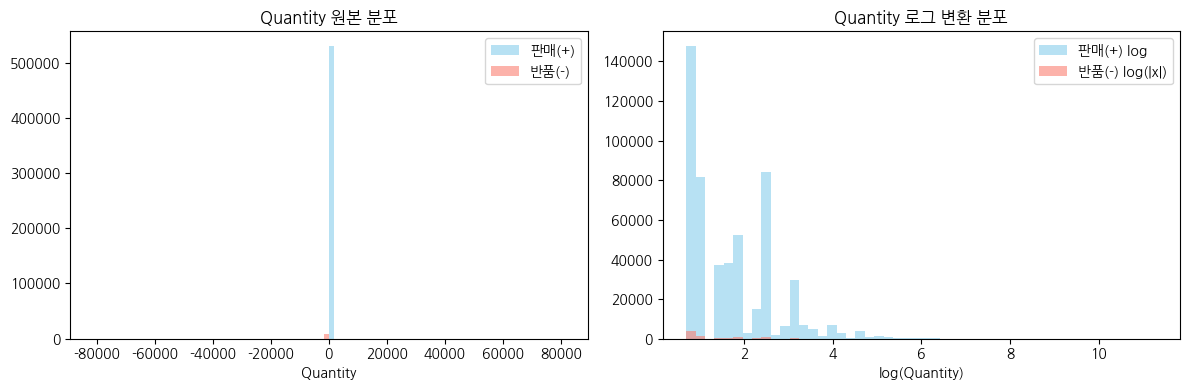

In [311]:
# 확인 결과, 적당한 수준의 quantity도 반품정도가 꽤 있어서
# 굉장히 많이 판매된 데이터의 수치를 확인할 예정입니다.


# 양수(판매) / 음수(반품) 분리
pos = df[df['Quantity'] > 0]['Quantity']
neg = df[df['Quantity'] < 0]['Quantity']

# 로그 변환 (음수는 절댓값으로 변환 후 로그)
pos_log = np.log1p(pos)
neg_log = np.log1p(np.abs(neg))

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(pos, bins=50, alpha=0.6, color='skyblue', label='판매(+)')
axes[0].hist(neg, bins=50, alpha=0.6, color='salmon', label='반품(-)')
axes[0].set_title('Quantity 원본 분포')
axes[0].set_xlabel('Quantity')
axes[0].legend()

axes[1].hist(pos_log, bins=50, alpha=0.6, color='skyblue', label='판매(+) log')
axes[1].hist(neg_log, bins=50, alpha=0.6, color='salmon', label='반품(-) log(|x|)')
axes[1].set_title('Quantity 로그 변환 분포')
axes[1].set_xlabel('log(Quantity)')
axes[1].legend()

plt.tight_layout()
plt.show()


In [312]:

# 극단적으로 많이 판매된 데이터가 이상치인지 검증해보려 합니다.

q99 = df['Quantity'].quantile(0.99)
high_qty = df[df['Quantity'] > q99]
normal_qty = df[df['Quantity'] <= q99]

print(f"상위 1% 기준: Quantity > {q99:.0f}")
print(f"상위 1% 거래 수: {len(high_qty)} / 전체: {len(df)} ({len(high_qty)/len(df)*100:.2f}%)")

# 수량에 따른 단가 할인이 적용되어 있을까?
# 그렇다면 이건 대량주문이 맞음.

print(pd.DataFrame({
    '평균 단가(UnitPrice)': [normal_qty['UnitPrice'].mean(), high_qty['UnitPrice'].mean()],
    '평균 수량(Quantity)': [normal_qty['Quantity'].mean(), high_qty['Quantity'].mean()]
}, index=['일반 주문(하위99%)', '대량 주문(상위1%)']))

# 수량/단가별 명백한 할인이 존재함을 확인함.
# 뭐가 제일 많이 팔렸을까?
print(high_qty['Description'].value_counts().head(10))


# 많이 팔린 제품들의 할인율을 확인해보자.
# with gpt
top_items = high_qty['Description'].value_counts().head(10).index.tolist()
discount_check = []
for item in top_items:
    avg_high = high_qty.loc[high_qty['Description'] == item, 'UnitPrice'].mean()
    avg_normal = normal_qty.loc[normal_qty['Description'] == item, 'UnitPrice'].mean()
    ratio = avg_high / avg_normal if avg_normal != 0 else None
    discount_check.append([item, avg_normal, avg_high, ratio])

discount_df = pd.DataFrame(discount_check,
                           columns=['상품명', '일반평균단가', '대량평균단가', '대량/일반 비율'])
discount_df['할인율(%)'] = (1 - discount_df['대량/일반 비율']) * 100
display(discount_df.sort_values('할인율(%)', ascending=False))

# 네... 확실히 품목/수량별 할인율이 존재하네요.
# 수량이 많다고 이상치로 처리하는건 논리가 안맞음을 확인했습니다.





상위 1% 기준: Quantity > 100
상위 1% 거래 수: 4849 / 전체: 539392 (0.90%)
              평균 단가(UnitPrice)  평균 수량(Quantity)
일반 주문(하위99%)          4.702963         7.279706
대량 주문(상위1%)           1.442017       292.737884
Description
PACK OF 72 RETROSPOT CAKE CASES        76
JUMBO BAG RED RETROSPOT                60
WORLD WAR 2 GLIDERS ASSTD DESIGNS      59
ASSORTED COLOUR BIRD ORNAMENT          57
PACK OF 60 PINK PAISLEY CAKE CASES     46
COLOUR GLASS T-LIGHT HOLDER HANGING    43
MINI PAINT SET VINTAGE                 42
BROCADE RING PURSE                     40
PACK OF 12 LONDON TISSUES              40
60 TEATIME FAIRY CAKE CASES            39
Name: count, dtype: int64


,상품명,일반평균단가,대량평균단가,대량/일반 비율,할인율(%)
7,BROCADE RING PURSE,1.221220,0.258000,0.211264,78.873577
4,PACK OF 60 PINK PAISLEY CAKE CASES,0.758059,0.430000,0.567238,43.276170
9,60 TEATIME FAIRY CAKE CASES,0.697656,0.420769,0.603118,39.688173
0,PACK OF 72 RETROSPOT CAKE CASES,0.771367,0.491053,0.636600,36.339986
8,PACK OF 12 LONDON TISSUES,0.456959,0.324000,0.709035,29.096512
1,JUMBO BAG RED RETROSPOT,2.492753,1.808167,0.725369,27.463059
2,WORLD WAR 2 GLIDERS ASSTD DESIGNS,0.328758,0.247458,0.752705,24.729496
5,COLOUR GLASS T-LIGHT HOLDER HANGING,0.736834,0.566047,0.768214,23.178575
3,ASSORTED COLOUR BIRD ORNAMENT,1.732105,1.466842,0.846855,15.314494
6,MINI PAINT SET VINTAGE,0.793994,0.678571,0.854630,14.536985


In [313]:
# ======================================================
# 1️⃣ IsReturn 생성 (Quantity 음수 → 반품)
# ======================================================
df['IsReturn'] = df['Quantity'].apply(lambda x: 1 if x < 0 else 0)
df['Quantity'] = df['Quantity'].abs()  # 판매량 절댓값 처리

print("반품 비율:", df['IsReturn'].mean() * 100, "%")

반품 비율: 1.7219387755102038 %


In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 539392 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     539392 non-null  object        
 1   StockCode     539392 non-null  object        
 2   Description   539392 non-null  object        
 3   Quantity      539392 non-null  int64         
 4   InvoiceDate   539392 non-null  datetime64[ns]
 5   UnitPrice     539392 non-null  float64       
 6   Country       539392 non-null  object        
 7   TotalPrice    539392 non-null  float64       
 8   DayOfWeek     539392 non-null  int32         
 9   InvoiceMonth  539392 non-null  int32         
 10  dayofweek     539392 non-null  int32         
 11  daytype       539392 non-null  object        
 12  Country_grp   539392 non-null  object        
 13  IsReturn      539392 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(2), object(6)
memory us

In [315]:
print(df['IsReturn'].value_counts())
print("반품 비율:", df['IsReturn'].mean() * 100, "%")


IsReturn
0    530104
1      9288
Name: count, dtype: int64
반품 비율: 1.7219387755102038 %


In [316]:

 class ReturnPredictor:
    def __init__(self, sampling_strategy=0.3, test_size=0.2, random_state=42):
        self.sampling_strategy = sampling_strategy
        self.test_size = test_size
        self.random_state = random_state
        self.scaler = StandardScaler()
        self.model = LogisticRegression(max_iter=1000)
        self.fitted = False

    def preprocess(self, df):
        # isreturn 정의
        df = df.copy()
        df["IsReturn"] = df["InvoiceNo"].astype(str).str.startswith("C").astype(int)
        df["Quantity"] = df["Quantity"].abs()

        X = df[["UnitPrice", "TotalPrice", "DayOfWeek", "Country", "daytype"]]
        y = df["IsReturn"]
        X = pd.get_dummies(X, columns=["Country", "daytype"], drop_first=True)
        return X, y

    def fit(self, df):
        # train
        X, y = self.preprocess(df)

        # split: stratify가 깨지면 자동 fallback
        try:
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=self.test_size, random_state=self.random_state, stratify=y
            )
            if y_train.nunique() < 2:
                raise ValueError
        except ValueError:
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=self.test_size, random_state=self.random_state, stratify=None
            )

        # 스케일링 + SMOTE
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)

        smote = SMOTE(random_state=self.random_state,
                      sampling_strategy=self.sampling_strategy, k_neighbors=3)
        X_res, y_res = smote.fit_resample(X_train_scaled, y_train)

        # 학습
        self.model.fit(X_res, y_res)
        self.fitted = True

        print(f" Train 분포: {y_train.value_counts().to_dict()} | After SMOTE: {pd.Series(y_res).value_counts().to_dict()}")
        return X_train_scaled, X_test_scaled, y_train, y_test

    def evaluate(self, X_test, y_test, threshold=0.5):
        # confusion matrics
        if not self.fitted:
            raise ValueError("불균형 처리 오류남")

        y_pred = (self.model.predict_proba(X_test)[:, 1] > threshold).astype(int)
        cm = confusion_matrix(y_test, y_pred)
        print("\nConfusion Matrix:\n", cm)
        print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

        metrics = classification_report(y_test, y_pred, digits=4, output_dict=True)["1"]
        return metrics["precision"], metrics["recall"], metrics["f1-score"]

    def check_overfitting(self, X_train, y_train, X_test, y_test):
        # overfitting 판단
        y_train_pred = self.model.predict(X_train)
        y_test_pred = self.model.predict(X_test)
        f1_train, f1_test = f1_score(y_train, y_train_pred), f1_score(y_test, y_test_pred)

        diff = f1_train - f1_test
        print(f"\nTrain F1: {f1_train:.4f}, Test F1: {f1_test:.4f}")
        print("overfitting 가능성 O" if diff > 0.05 else " overfitting 가능성 X")
        return f1_train, f1_test


In [317]:
predictor = ReturnPredictor(sampling_strategy=0.3)
X_train, X_test, y_train, y_test = predictor.fit(df)
predictor.evaluate(X_test, y_test)
predictor.check_overfitting(X_train, y_train, X_test, y_test)

 Train 분포: {0: 424083, 1: 7430} | After SMOTE: {0: 424083, 1: 127224}

Confusion Matrix:
 [[105990     31]
 [   190   1668]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9982    0.9997    0.9990    106021
           1     0.9818    0.8977    0.9379      1858

    accuracy                         0.9980    107879
   macro avg     0.9900    0.9487    0.9684    107879
weighted avg     0.9979    0.9980    0.9979    107879


Train F1: 0.9460, Test F1: 0.9379
 overfitting 가능성 X


(0.9460419132493212, 0.937868990722519)